In [1]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
from scipy.special import erfc
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
import pandas as pd
import cmath, math, numpy
import seaborn as sns


In [2]:
# Gerando os símbolos 16 QAM
mapping_table = [-3-3j, -3-1j, -3+3j, -3+1j, -1-3j, -1-1j, -1+3j, -1+1j, 3-3j, 3-1j, 3+3j, 3+1j, 1-3j,
1-1j, 1+3j, 1+1j]

# Definindo o número de simbolos 16 QAM.
N = 100000

# Generate N 4-bit symbols.
bits = np.random.randint(0,16,N)

def mod(bits):
    symbols = np.zeros((len(bits),),dtype=complex)
    for i in range(0,len(bits)): symbols[i] = mapping_table[bits[i]]/np.sqrt(10)
    return symbols


In [6]:
# Definindo o número de simbolos 16 QAM.
N = 100000

# Criando o vetor EsN0
EsN0dB = np.arange(0,22,2)



ser_simu = np.zeros(len(EsN0dB))
ser_theo = np.zeros(len(EsN0dB))
for idx in range(0,len(EsN0dB)):
    M = 16
    k = np.sqrt(3/(2*(M-1)))
    ser_theo[idx] = (2*(1-(1/np.sqrt(M)))*erfc(k*np.sqrt(10.0**(EsN0dB[idx]/10.0))))-((1-(2/np.sqrt(M))+(1/M))*erfc(k*np.sqrt(10.0**(EsN0dB[idx]/10.0)))**2)
    
    print('Es/N0 dB:', EsN0dB[idx])
    
    EsN0Lin = 10.0**(-(EsN0dB[idx]/10.0))
    
    ip =(2.0 * (np.random.rand(N, 1) >= 0.5) - 1.0) + 1j*(2.0 * (np.random.rand(N, 1) >= 0.5) - 1.0)
    
    s = (1/np.sqrt(2))*ip;
    
    
    noise = np.sqrt(1.0/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))
    
  
    y = s + np.sqrt(EsN0Lin)*noise
    
    
    ip_re_test, ip_re_train, y_re_test, y_re_train = train_test_split(ip.real, y.real, random_state=42)
    
    ip_im_test, ip_im_train, y_im_test, y_im_train = train_test_split(ip.imag, y.imag, random_state=42)
    
    
    gnb_re = KNeighborsClassifier(10,weights='distance')
    gnb_im = KNeighborsClassifier(10,weights='distance')
    gnb_re.fit(y_re_train, ip_re_train.ravel())
    gnb_im.fit(y_im_train, ip_im_train.ravel())
    
    
    detected_ip_re = gnb_re.predict(y_re_test)
    detected_ip_re = detected_ip_re.reshape(len(y_re_test), 1)
    
    detected_ip_im = gnb_im.predict(y_im_test)
    detected_ip_im = detected_ip_im.reshape(len(y_im_test), 1)    
        
    error_re = (ip_re_test != detected_ip_re)
    error_im = (ip_im_test != detected_ip_im)
    error = 0;
    for i in range(0, len(ip_re_test)): 
        if(error_re[i]==True or error_im[i]==True): 
            error = error + 1
    
    ser_simu[idx] = 1.0 * error / len(ip_re_test)
    
   # M = 16
   # k = np.sqrt(3/(2*(M-1)))
   # ser_theo[idx] = (2*(1-(1/np.sqrt(M)))*erfc(k*np.sqrt(10.0**(EsN0dB[idx]/10.0))))-((1-(2/np.sqrt(M))+(1/M))*erfc(k*np.sqrt(10.0**(EsN0dB[idx]/10.0)))**2)

Es/N0 dB: 0
Es/N0 dB: 2
Es/N0 dB: 4
Es/N0 dB: 6
Es/N0 dB: 8
Es/N0 dB: 10
Es/N0 dB: 12
Es/N0 dB: 14
Es/N0 dB: 16
Es/N0 dB: 18
Es/N0 dB: 20


In [7]:
for i in range(0,len(ser_simu)): print('Es/N0:%d \t- SER: %e' % (EsN0dB[i], ser_simu[i]))

Es/N0:0 	- SER: 3.541867e-01
Es/N0:2 	- SER: 2.423600e-01
Es/N0:4 	- SER: 1.355333e-01
Es/N0:6 	- SER: 5.476000e-02
Es/N0:8 	- SER: 1.480000e-02
Es/N0:10 	- SER: 1.813333e-03
Es/N0:12 	- SER: 2.666667e-05
Es/N0:14 	- SER: 0.000000e+00
Es/N0:16 	- SER: 0.000000e+00
Es/N0:18 	- SER: 0.000000e+00
Es/N0:20 	- SER: 0.000000e+00


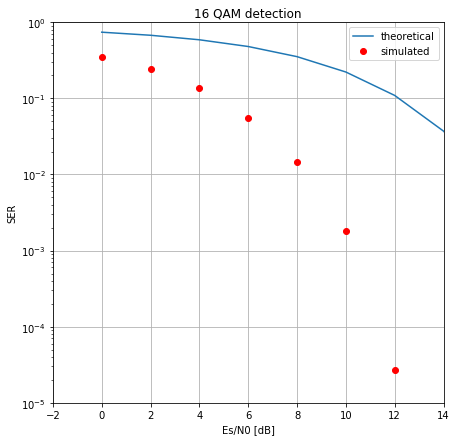

In [8]:
fig = plt.figure(figsize=(7,7))
plt.plot(EsN0dB, ser_theo, label='theoretical')
plt.plot(EsN0dB, ser_simu, 'ro', label='simulated')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Es/N0 [dB]')
plt.ylabel('SER')
plt.grid(True)
plt.title('16 QAM detection')
plt.legend()
plt.xlim([-2, 14])
plt.ylim([1e-5, 1])
plt.show()